In [3]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

filename = 'UCB1901PetraleSole'
c = __import__("UCB1901PetraleSoleConfig")

In [4]:
specname = 'UCB1901PetraleSole' + '.spe'
path = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019'
spectrum = path + r'\\' + specname
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 173962 #s
wetweight = 519.9 #g
source_energies = [605, 609, 662, 1460, 2614]

params = {
    '605': [1, [[-2, -1], [-0.75, 1.25], [1, 2]]],
    '609': [5, [[-2, -1], [-0.75, 0.75], [1, 2]]],
    '662': [5, [[-2, -1], [-0.4, 0.4], [1, 2]]],
    '1460': [15, [[-2, -1], [-0.5, 0.75], [1, 2]]],
    '2614': [20, [[-2, -1], [-0.4, 0.75], [1, 2]]],
}

spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\\UCB1901PetraleSole.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


In [5]:
#np.where(spec.bin_centers_kev==605)
mask = (spec.bin_centers_kev > 600)&(spec.bin_centers_kev < 620)

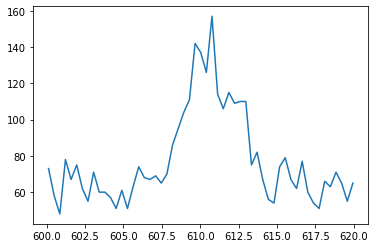

In [6]:
plt.plot(spec.bin_centers_kev[mask], spec.counts_vals[mask])

In [7]:
roi.find_peak_energies()
roi.roi_pars

605keV peak changed to 607keV
609keV peak changed to 611keV
662keV peak changed to 664keV
1460keV peak changed to 1462keV
2614keV peak changed to 2617keV


C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'605': [607,
  5,
  [[-2, -1], [-0.5, 0.5], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '609': [611,
  5,
  [[-2, -1], [-0.5, 0.5], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '662': [664,
  5,
  [[-2, -1], [-0.5, 0.5], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '1460': [1462,
  5,
  [[-2, -1], [-0.5, 0.5], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '2614': [2617,
  5,
  [[-2, -1], [-0.5, 0.5], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]]}

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


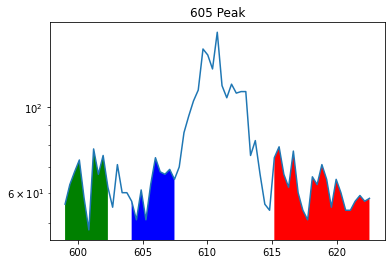

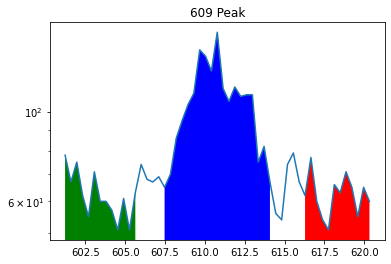

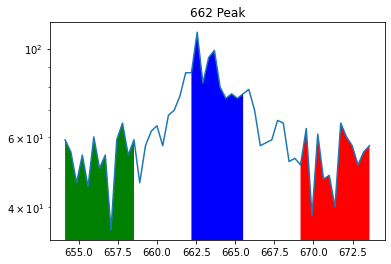

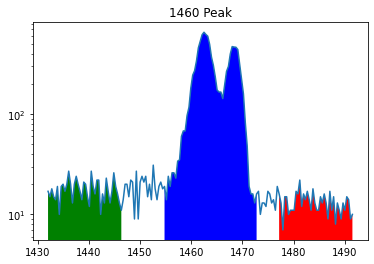

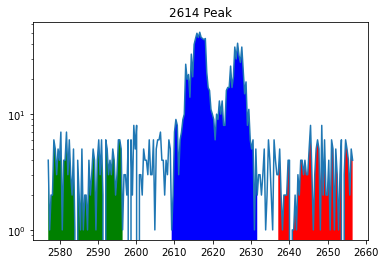

In [11]:
for key in params:
    roi.set_sideband(int(key), params[key][0], params[key][1])

roi.set_sideband(605, 4, [[-2, -1], [-0.75, 0.5], [2, 4]])
roi.set_sideband(609, 5, [[-2, -1], [-0.75, 0.75], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.4, 0.4], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.5, 0.75], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.4, 0.75], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [16]:
roi_counts, roi_unc = roi.get_counts()
print(roi_counts)
print(roi_unc)

eff_func = am.Efficiency()
eff_func.set_parameters()

background spec sidebands 905.7144021812541
bg peak counts 822.2326207852051
signal bg 891.8750000000001
signal peak 924.0000000000001
background spec sidebands 732.7938479528553
bg peak counts 1392.7613780647355
signal bg 811.2083333333334
signal peak 1536.0
background spec sidebands 575.2788609600475
bg peak counts 725.5783371990259
signal bg 640.6153846153846
signal peak 1022.9999999999999
background spec sidebands 720.376457353242
bg peak counts 733.6328608312075
signal bg 1964.5000000000005
signal peak 5511.999999999999
background spec sidebands 209.1078250662531
bg peak counts 331.5778895248093
signal bg 148.6153846153846
signal peak 473.0
[115.60678139604897, 64.82413655478649, 232.08513914563684, 3534.243596522033, 201.91455092605918]
[51.03667363487049, 60.59275857826594, 49.063099374367404, 86.56786255664471, 31.596592033039943]
Loaded fit parameters 0-4: [-0.09752124 -0.41681079 -0.73212546 -1.11108914 -4.56337189]
Loaded fit covariance: [[3.26231638e-03 1.83712674e-02 3.065

In [ ]:
efficiency = []
efficiencyunc = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))
    efficiencyunc.append(eff_func.get_eff_error(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

In [ ]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

In [ ]:
config = 'UCB1901PetraleSoleConfig'
importlib.import_module(config)

livetime

In [ ]:
csvname = 'UCB1901PetraleSole' + '.spe'
with open('test.csv', mode='w') as test:
    tester = csv.writer(test, delimiter=',', quoting=csv.QUOTE_MINIMAL)

    tester.writerow([14, 2, 3])
    tester.writerow([4, 5, 6])
    tester.writerow([4, 5, 7])

In [ ]:
[((i / j) / (c.weight / 1000)) for i, j in zip(uncrate, efficiency)]

7

[1.01, 2.0, 3.1]


[[4, 5, 6], 1, 2, 3]
